## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.models import Sequential
from keras.layers import Dense



def build_mlp(input, output=10, units=[256, 128,128]):
    """Code Here
    建立你的神經網路
    """
    model=Sequential()
    for i, n in enumerate(units):
      if i==0:
        model.add(Dense(n, input_shape=input, activation='relu'))
      else:
        model.add(Dense(n, activation='relu'))
    model.add(Dense(output, activation='softmax'))
    return model

In [6]:
"""Code Here
設定超參數
"""
batch_size = 256
epochs = 50

In [7]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping
es=[25,10,5]

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for i in es:
  earlystop = EarlyStopping(monitor="val_loss", 
                          patience=i, 
                          verbose=1
                          )

  model= build_mlp(input=x_train.shape[1:])
  model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
  model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), callbacks=[earlystop] )
  results[i] = {'train-loss': model.history.history["loss"], 'valid-loss': model.history.history["val_loss"], 'train-acc': model.history.history["accuracy"], 'valid-acc': model.history.history["val_accuracy"]}

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.9114 - accuracy: 0.3095 - val_loss: 1.7484 - val_accuracy: 0.3779
Epoch 2/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.7106 - accuracy: 0.3840 - val_loss: 1.6456 - val_accuracy: 0.4101
Epoch 3/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.6070 - accuracy: 0.4266 - val_loss: 1.5938 - val_accuracy: 0.4293
Epoch 4/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.5560 - accuracy: 0.4447 - val_loss: 1.5462 - val_accuracy: 0.4488
Epoch 5/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.5119 - accuracy: 0.4597 - val_loss: 1.5406 - val_accuracy: 0.4519
Epoch 6/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.4716 - accuracy: 0.4754 - val_loss: 1.5121 - val_accuracy: 0.4667
Epoch 7/50
50000/50000 [==============================] - 4s 71us/st

50000/50000 [==============================] - 4s 72us/step - loss: 1.5340 - accuracy: 0.4509 - val_loss: 1.5434 - val_accuracy: 0.4475
Epoch 6/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.4882 - accuracy: 0.4685 - val_loss: 1.5327 - val_accuracy: 0.4615
Epoch 7/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.4622 - accuracy: 0.4796 - val_loss: 1.5225 - val_accuracy: 0.4623
Epoch 8/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.4388 - accuracy: 0.4880 - val_loss: 1.4907 - val_accuracy: 0.4703
Epoch 9/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.4136 - accuracy: 0.4954 - val_loss: 1.4448 - val_accuracy: 0.4843
Epoch 10/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.3843 - accuracy: 0.5073 - val_loss: 1.4587 - val_accuracy: 0.4833
Epoch 11/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.3687 - accuracy: 0.5121 - val_loss: 1.4778 - v

Epoch 27/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.1161 - accuracy: 0.6021 - val_loss: 1.4051 - val_accuracy: 0.5201
Epoch 00027: early stopping


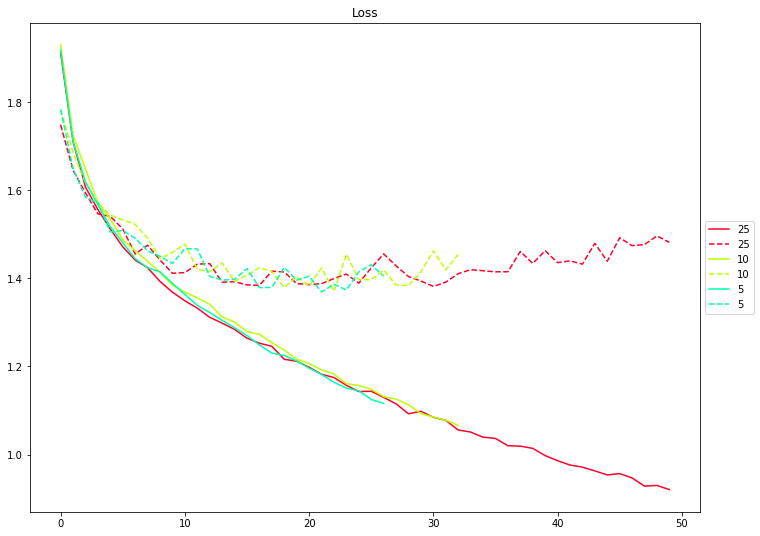

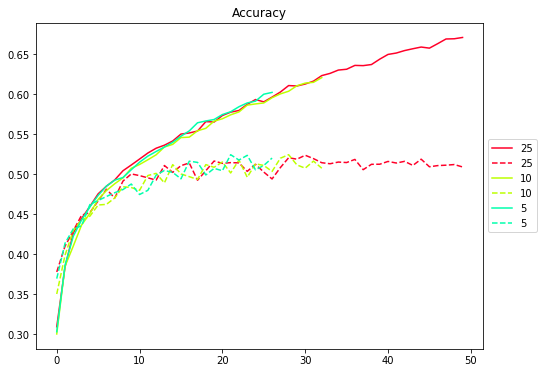

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = 20

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i*5])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i*5])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i*5])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i*5])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()